# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) which is in the form of a .csv file. The data read in a data frame below contains the following column fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
**Importing data analysis libraries: numpy and pandas**

In [22]:
import numpy as numpi
import pandas as panda

**Importing visualization libraries and setting %matplotlib inline.**

In [24]:
import matplotlib.pyplot as matplot
import seaborn as sborn
%matplotlib inline

**Reading in the csv data file as a data frame**

In [26]:
df_911Calls = panda.read_csv('911.csv')

**Check the information of the data frame**

In [28]:
df_911Calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of data frame**

In [30]:
df_911Calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Analysis

**Displaying the top 5 zipcodes for 911 calls**

In [32]:
df_911Calls['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

**Displaying the top 5 townships (twp) for 911 calls**

In [34]:
df_911Calls['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**Taking a look at how many unique title codes there are within the 'title' column**

In [36]:
df_911Calls['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I have used the .apply() function with a custom lambda expression to create a new column in the data frame called "Reasons" that contains this string value.** 

**For example, if the title column value is "EMS: BACK PAINS/INJURY", the Reasons column value would be "EMS".**

In [38]:
def reason(df_title):
    reasonString = ""

    for i in range(0, len(df_title)):
        reasonString += df_title[i]
        if df_title[i + 1] == ":":
            return reasonString

df_911Calls['Reasons'] = df_911Calls['title'].apply(lambda title_string = df_911Calls['title']: reason(title_string))

**Checking for the most common Reason for a 911 call based off of this new column. (Its seen to be EMS)**

In [44]:
df_911Calls['Reasons'].value_counts()

Reasons
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**Now for visualisation, we create a countplot of 911 calls by Reasons using seaborn.**

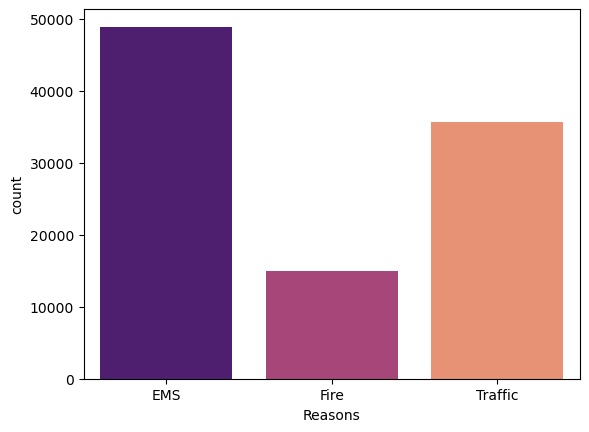

In [46]:
sborn.countplot(data = df_911Calls, x = 'Reasons', hue = 'Reasons', palette = 'magma')
matplot.show()

___
**Now let us begin to focus on time information. Let us start by checking the data type of the objects in the timeStamp column.**

In [48]:
type(df_911Calls['timeStamp'].iloc[0])

str

**These timestamp entries are all strings. Usage of the [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) function will help convert the column from strings to DateTime objects.**

In [51]:
df_911Calls['timeStamp'] = panda.to_datetime(df_911Calls['timeStamp'])

**We can grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Now that the entries of the timestamp column are now DateTime objects, we will use the .apply() function to create 3 new columns called Hour, Month, and Day of Week. These columns will be created based off of the timeStamp column.**

In [54]:
df_911Calls['Hour'] = df_911Calls['timeStamp'].apply(lambda time: time.hour) 
df_911Calls['Month'] = df_911Calls['timeStamp'].apply(lambda time: time.month)
df_911Calls['Day of Week'] = df_911Calls['timeStamp'].apply(lambda time: time.dayofweek)

In [56]:
df_911Calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**Notice how the Day of Week is an integer 0-6. We use the .map() function with the dictionary below to help map the actual string names to the day of the week**

In [61]:
dayofweek_dict = { 0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun' }
df_911Calls['Day of Week'] = df_911Calls['Day of Week'].map(dayofweek_dict)

**Now we use seaborn to create a countplot of the Day of Week column with the hue based off of the Reasons column.**

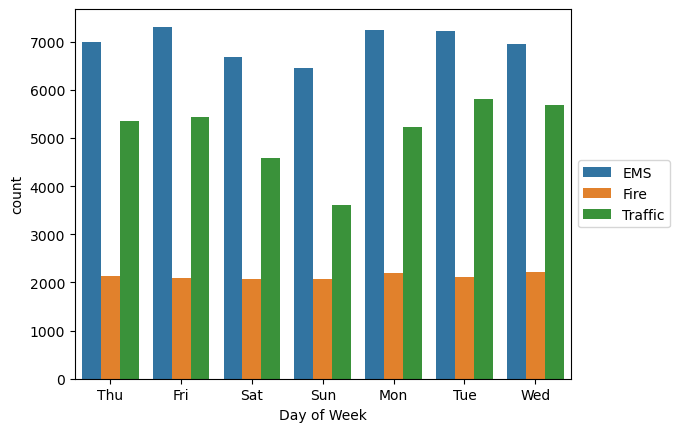

In [64]:
sborn.countplot(data = df_911Calls, x = 'Day of Week', hue = 'Reasons')
matplot.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
matplot.show()

**Now we do the same for Month column:**

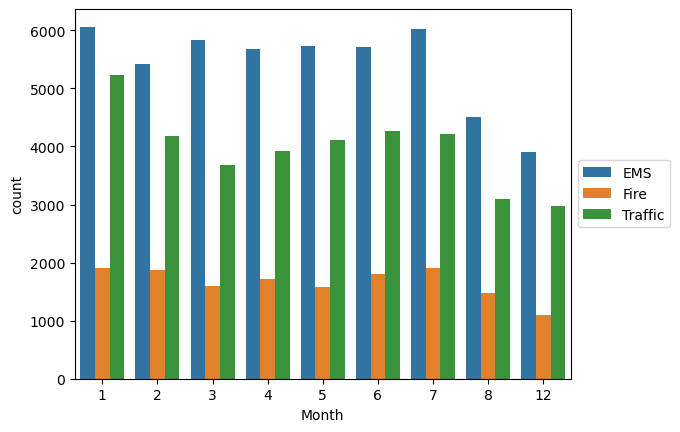

In [67]:
sborn.countplot(data = df_911Calls, x = 'Month', hue = 'Reasons')
matplot.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
matplot.show()

**Notice the the plot has missing Months. We can fill in this information by plotting the information in another way, perhaps a simple line plot that fills in the missing months. In order to do this we'll need to do some work with pandas.**

**We now create a gropuby object called byMonth, where we will group the DataFrame by the Month column and use the .count() method for aggregation.**

In [71]:
# .groupby() returns a groupby-object
# .count() used on a groupby-object returns a dataframe

byMonth = df_911Calls.groupby('Month')
byMonth.count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**A simple line-plot off of the dataframe indicating the count of calls per month. (using any column)**

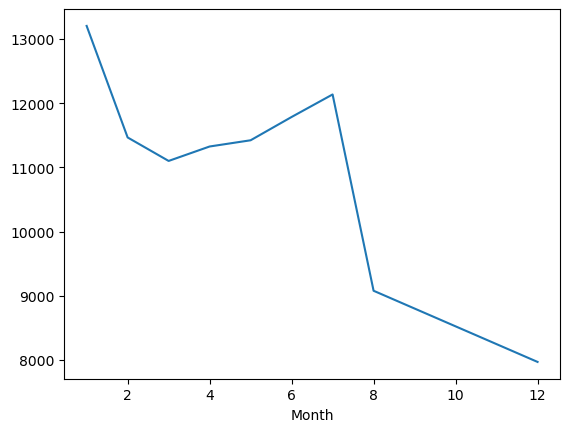

In [74]:
byMonth.count()['Day of Week'].plot.line()
matplot.show()

**Using seaborn's linear model function, .lmplot() to create a linear fit on the number of calls per month. We will need to temporarily reset the index to a column.**

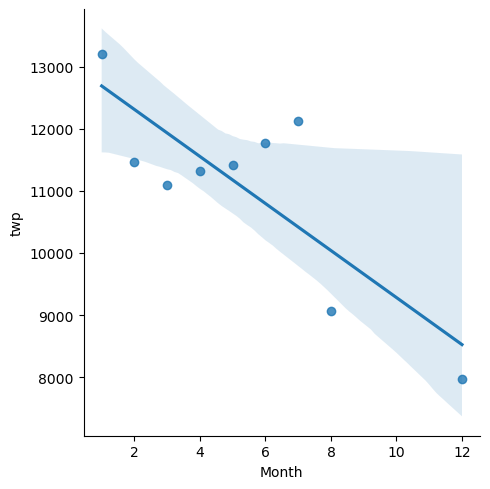

In [77]:
temp_df = byMonth.count().reset_index()
sborn.lmplot(data = temp_df, x = 'Month', y = 'twp')
matplot.show()

**Creating a new column called 'Date' that contains the date from the timeStamp column. We use .apply() function along with the .date() method.** 

In [80]:
df_911Calls['Date'] = df_911Calls['timeStamp'].apply(lambda time: time.date())
df_911Calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Parsing in the Date column in the .groupby() method with the .count() method and create a plot of counts of 911 calls.**

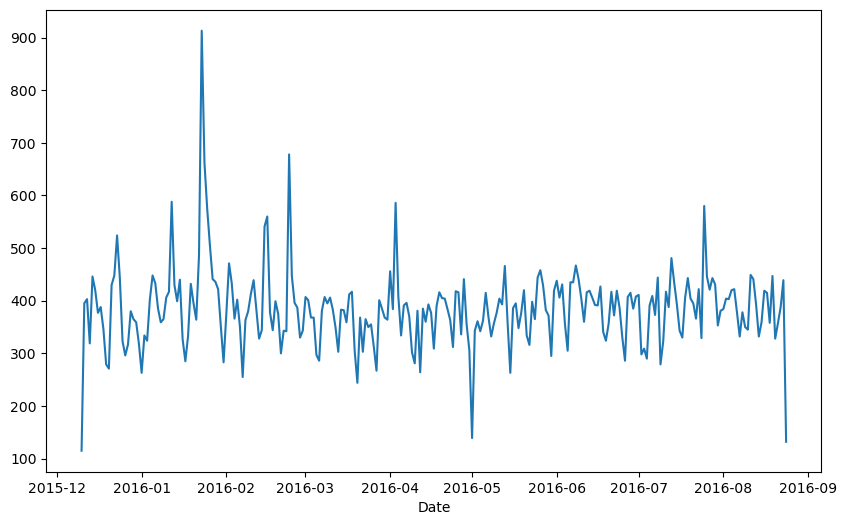

In [83]:
matplot.figure(figsize = (10, 6))
byDate = df_911Calls.groupby('Date')
byDate.count()['twp'].plot()
matplot.show()

**Recreating 3 similar plots as the above but with each plot representing a Reason for the 911 call**

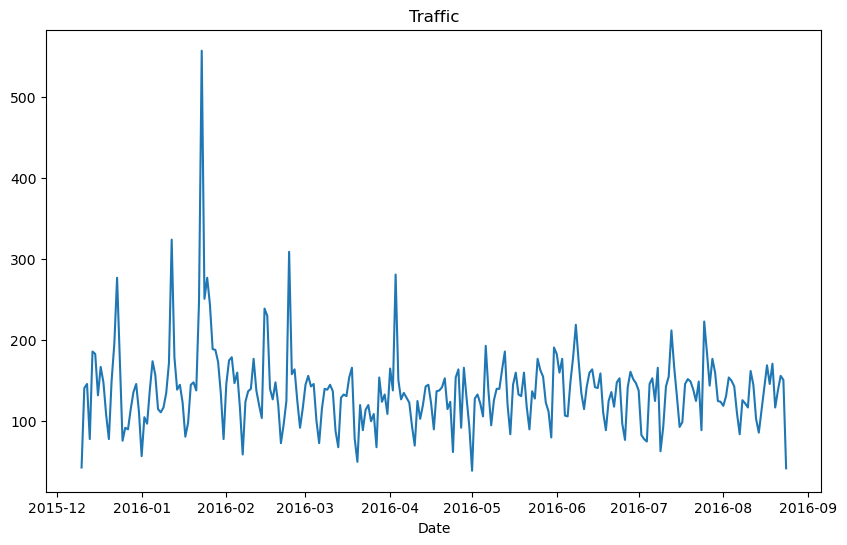

In [86]:
matplot.figure(figsize = (10, 6))
temp_dfTraffic = df_911Calls[df_911Calls['Reasons'] == 'Traffic'].groupby('Date')
temp_dfTraffic.count()['twp'].plot()

matplot.title('Traffic')
matplot.show()

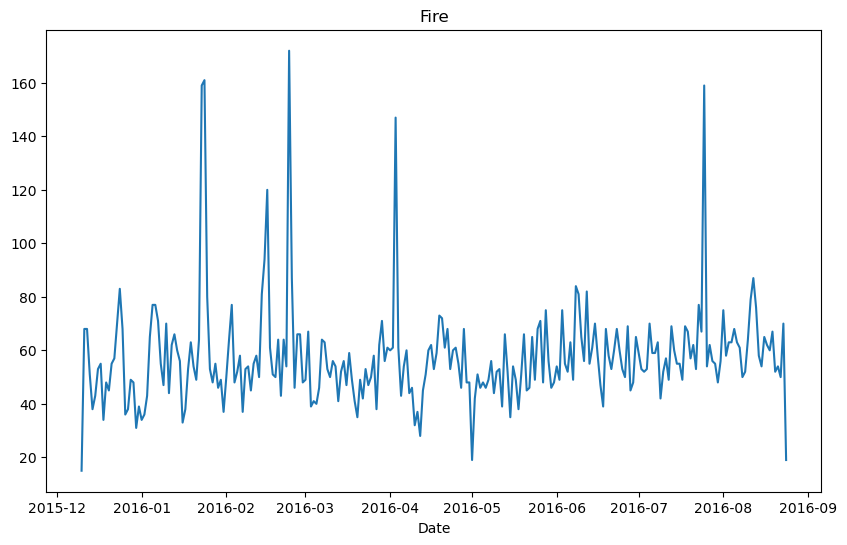

In [88]:
matplot.figure(figsize = (10, 6))
temp_dfFire = df_911Calls[df_911Calls['Reasons'] == 'Fire'].groupby('Date')
temp_dfFire.count()['twp'].plot()

matplot.title('Fire')
matplot.show()

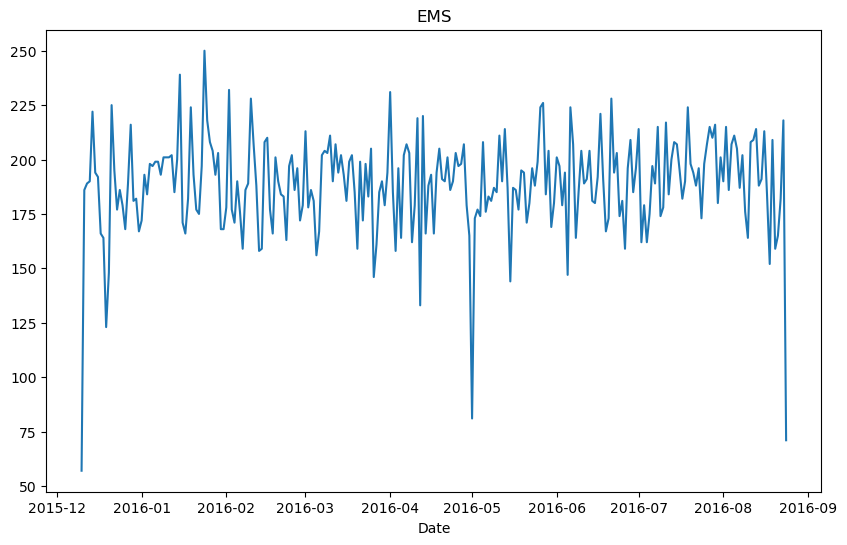

In [90]:
matplot.figure(figsize = (10, 6))
temp_dfEMS = df_911Calls[df_911Calls['Reasons'] == 'EMS'].groupby('Date')
temp_dfEMS.count()['twp'].plot()

matplot.title('EMS')
matplot.show()

____
**Moving on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but we will go ahead and combine .groupby() with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [93]:
by_dayHour = df_911Calls.groupby(by = ['Day of Week', 'Hour']).count()['Reasons'].unstack()
by_dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Creating a HeatMap using this new DataFrame.**

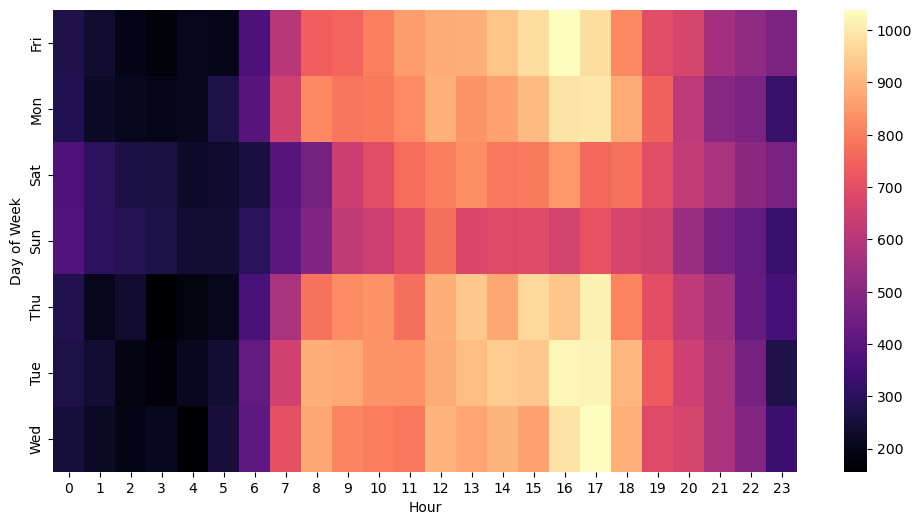

In [96]:
matplot.figure(figsize = (12, 6))
sborn.heatmap(by_dayHour, cmap = 'magma')
matplot.show()

**Now for a clustermap using this DataFrame.**

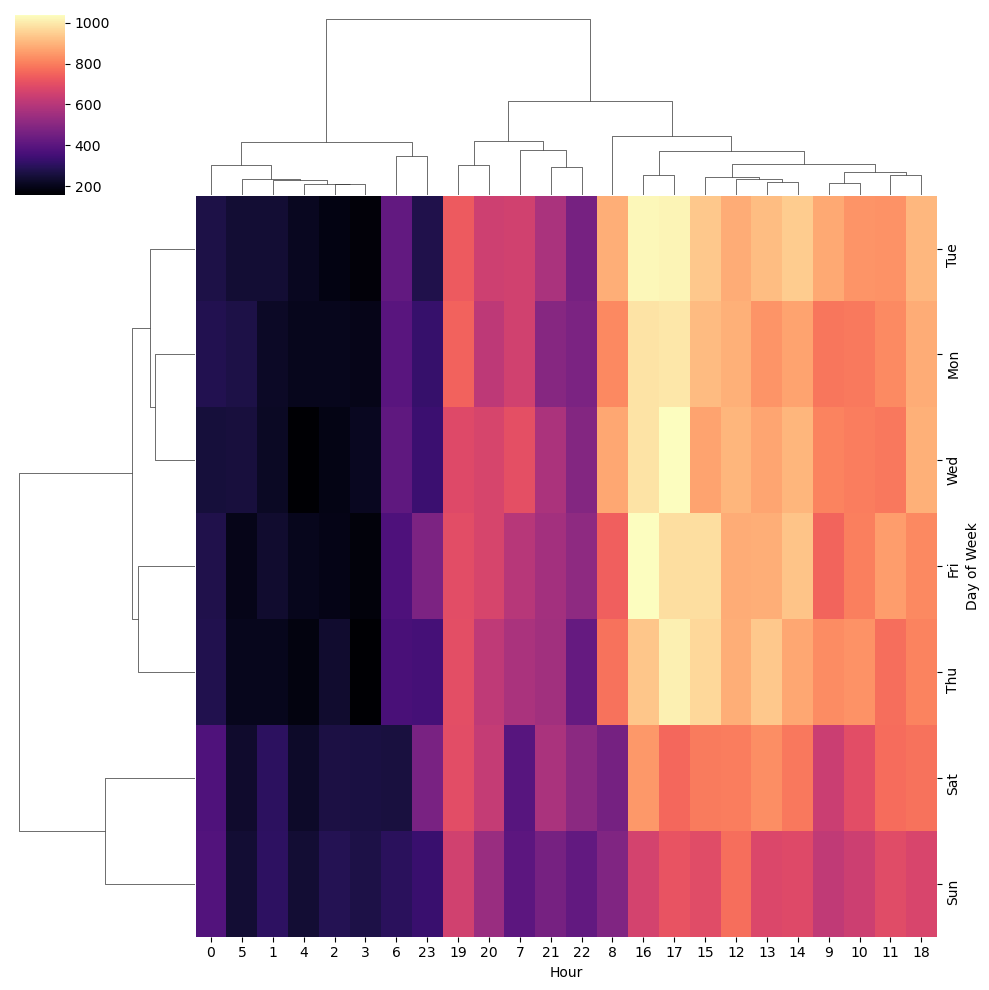

In [99]:
sborn.clustermap(by_dayHour, cmap = 'magma')
matplot.show()

**Repeating these same operations and plots for a DataFrame that shows the Month as the column.**

In [102]:
by_dayMonth = df_911Calls.groupby(by = ['Day of Week', 'Month']).count()['Reasons'].unstack()
by_dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


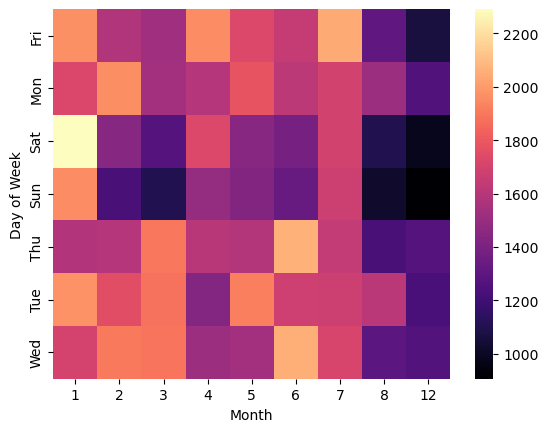

In [104]:
sborn.heatmap(by_dayMonth, cmap = 'magma')
matplot.show()

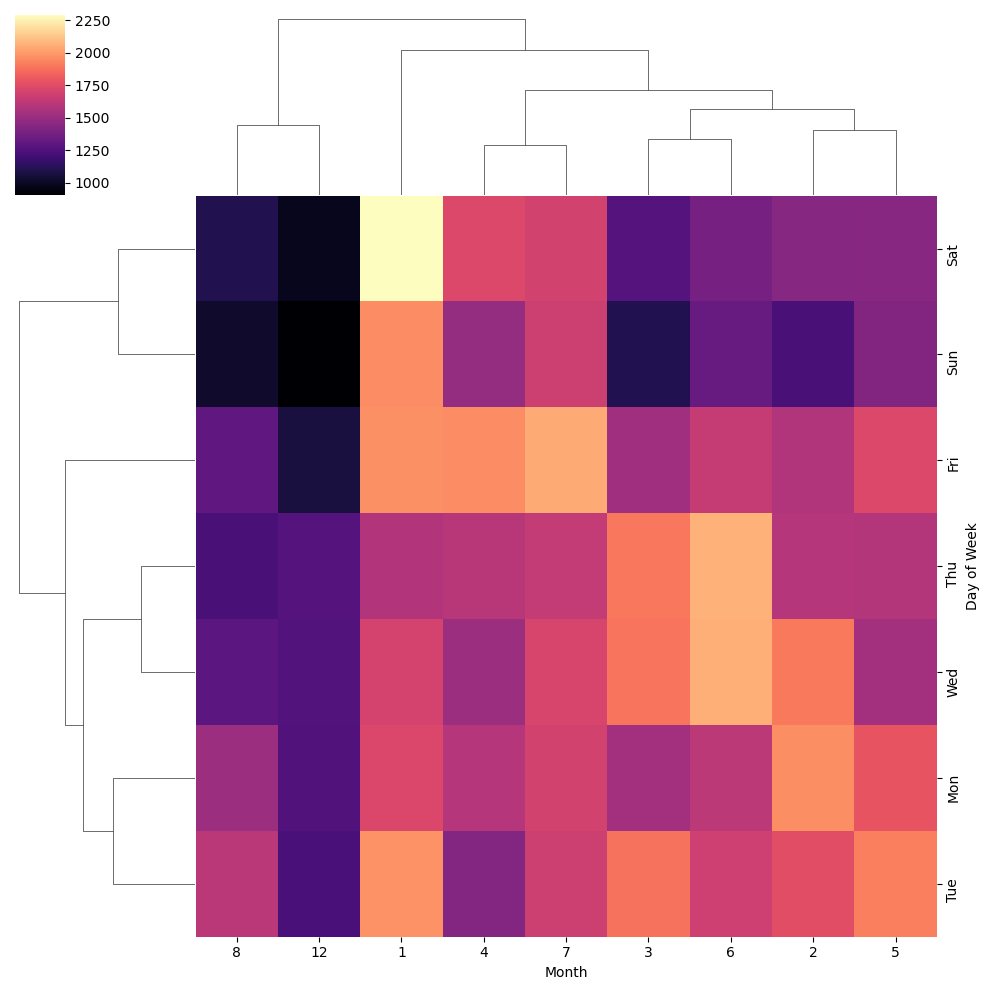

In [106]:
sborn.clustermap(by_dayMonth, cmap = 'magma')
matplot.show()

## Conlusion

**The analysis of emergency call records revealed that EMS-related incidents were the most common type of 911 call, significantly exceeding Fire and Traffic-related categories. Temporal trends indicated that call volumes peaked consistently during the first to third quarter of the year, suggesting heightened emergency activity across spring and summer months. Furthermore, Fridays, Mondays, and Tuesdays showed the highest overall call frequency, establishing them as the busiest days for emergency response services. These patterns highlight clear seasonal and weekday-driven fluctuations in emergency demand, offering meaningful insight into operational load distribution across time.**